In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objects as go

from wordcloud import WordCloud
# from plotly import graph_objects as go
# from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Data

In [2]:
movies = pd.read_csv('netflix_data.csv')
movies = movies[movies['type'] == 'Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


# EDA

In [3]:
print(f'Number of Movies: {len(movies)} \n')
print(movies.info(), '\n')

print('Null Values in Data:\n', movies.isnull().sum())

Number of Movies: 6131 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB
None 

Null Values in Data:
 show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          

In [4]:
movies.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6131,6131,6131,5943,5656,5691,6131,6131.000000,6129,6128,6131,6131
unique,6131,1,6131,4354,5445,651,1533,NaN,17,205,278,6105
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"January 1, 2020",NaN,TV-MA,90 min,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,13,2058,97,NaN,2062,152,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.121514,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.678169,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


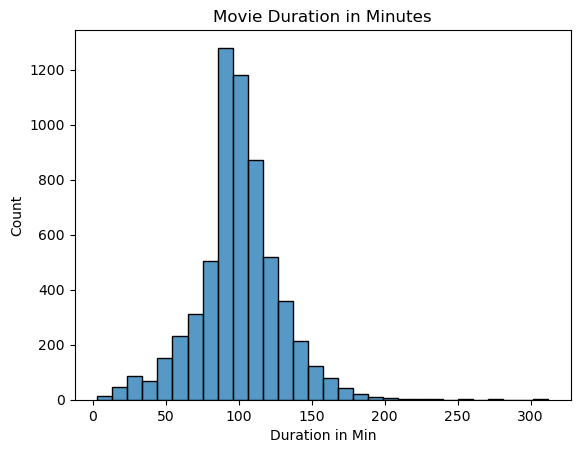

In [5]:
movies['duration_min'] = pd.to_numeric(movies['duration'].str.split(' ', expand = True)[0])
sns.histplot(data = movies, x = 'duration_min', bins = 30).set(
    title = 'Movie Duration in Minutes',
    xlabel = 'Duration in Min'
);

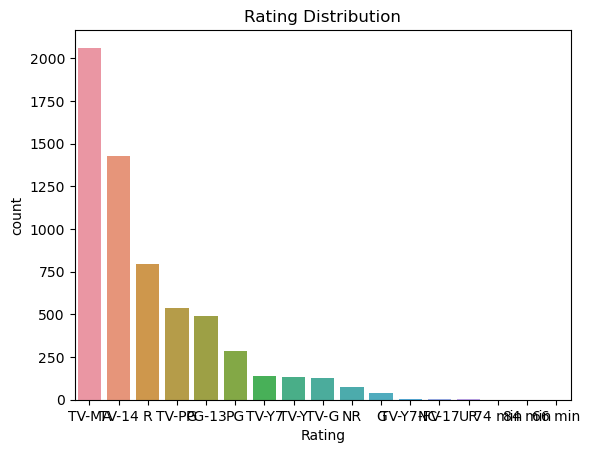

In [6]:
chart = sns.countplot(data = movies, x = 'rating', order = movies['rating'].value_counts().index).set(
    title = 'Rating Distribution',
    xlabel = 'Rating'
);


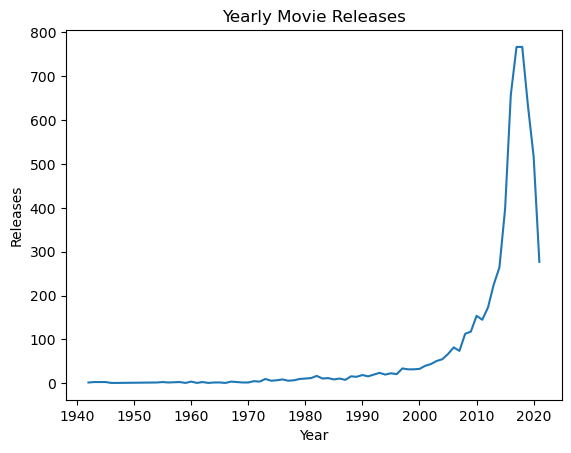

In [7]:
yr = movies['release_year'].value_counts()


sns.lineplot(data=yr).set(title = 'Yearly Movie Releases', xlabel = 'Year', ylabel = 'Releases');


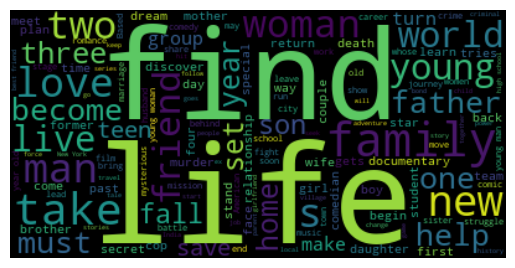

In [8]:
descriptions = movies['description'].values

text = ' '.join(descriptions)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

# Recommendation System

In [9]:
movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [10]:
movies['description'] = movies['description'].fillna('')
movies['description'].isna().sum()

0

In [20]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(movies['description'])
tfidf_matrix.shape

(6131, 15483)

In [14]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [18]:
# get list of movie titles for array.
indices = pd.Series(movies.index, index = movies['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [23]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [30]:
def get_recomandations(title, cosine_sim  = cosine_sim_df):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))
    
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    
    movie_indicies = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indicies]

In [26]:
movies[movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [31]:
get_recomandations('Last Breath')

7061                                          In The Deep
940                        Motu Patlu: Deep Sea Adventure
2703                                               Mine 9
6466                                       Chicken Little
7616                               NOVA: Thai Cave Rescue
636                                          The Ice Road
5773    My Little Pony Equestria Girls: Legend of Ever...
4616                                          Big Miracle
895                                                Oxygen
3070                                              Posesif
Name: title, dtype: object

In [34]:
movies[movies['title'] == 'In The Deep'].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'